# Estimation

Hello World

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

def sample(pars,N):
    b,a = pars
    x = np.random.uniform(5,10,size = (N,))
    z = a*x + b
    eps = np.random.normal(0,1, size = z.shape)
    y = z+eps
    return x,y

def build_ols_nll(x,y):
    def lhood(pars):
        b,a = pars
        z = a*x + b
        w = scipy.stats.norm(loc = z,scale = 1).logpdf(y)
        return -w.sum()
    return lhood

def solve_analytically(x,y):
    X = np.column_stack([x,np.ones(len(x))])
    Xt =  X.T
    a = np.linalg.inv(Xt.dot(X))
    result = a.dot(Xt.dot(y))
    errors = a
    return result,a

def two_sided_t_tailprob(t):
    return (1-scipy.stats.t(8).cdf(t))*2

def _get_errors(x,y,true,ndata,npars):
    _p,_a = solve_analytically(x,y)
    _e = y-(_p[1] + _p[0]*x)
    _errs = np.sqrt(np.diag(_e.T.dot(_e)/(ndata-npars)*_a)) #this is one of HC0-HC4
    _t = (_p-true)/_errs
    return _p,_errs,_t

def solve_via_minimization(x,y):
    result = scipy.optimize.minimize(build_ols_nll(x,y), x0 = np.array([5.,5.]))
    return result

def solve_via_statsmodels(x,y):
    return sm.OLS(y,sm.add_constant(x)).fit().params



[ 2.10958934 -0.71632953]
[-0.71632821  2.10958916]
108.27868183325442
[-0.71632821  2.10958916]


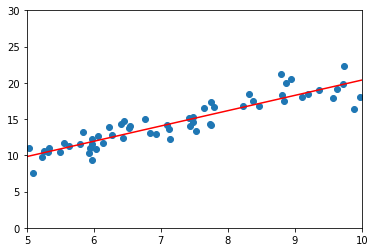

In [3]:
def plot(result,x,y):
    b,a = result.x
    plt.scatter(x,y)
    x = np.linspace(5,10,101)
    z = a*x+b
    plt.plot(x,z,c='r')
    plt.xlim(5,10)
    plt.ylim(0,30)


x,y = sample(np.array([0.,2.]), N = 60)
print(solve_analytically(x,y)[0])
print(solve_via_minimization(x,y).x)
result = solve_via_minimization(x,y)

print(result.fun)
print(result.x)
plot(result,x,y)

In [18]:
true_par = np.array([1.0,2.0])
npar = 2
ndata = 5


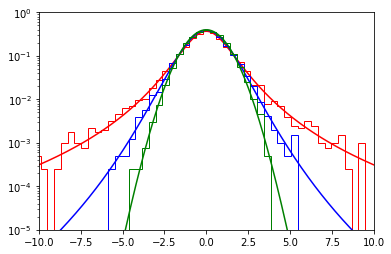

In [26]:
def plot_t_stat(npar,ndata,c):
    tvals = np.array([_get_errors(*sample(true_par, N = ndata),np.array([2.0,1.0]),ndata,npar)[-1] for i in range(10000)])
    o = tvals[:,0]
    plt.hist(o, bins  = np.linspace(-20,20,100), density=True, histtype='step', edgecolor=c)
    plt.semilogy()
    xi = np.linspace(-20,20,1001)
    yi = scipy.stats.t(ndata-npar).pdf(xi)
    plt.xlim(-10,10)
    plt.ylim(1e-5,1)
    plt.plot(xi,yi,c=c)
plot_t_stat(npar=2,ndata=5, c='r')    
plot_t_stat(npar=2,ndata=10, c='b')    
plot_t_stat(npar=2,ndata=100, c = 'g')    

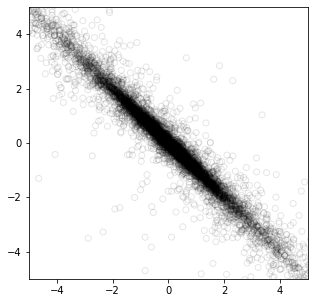

In [12]:
import matplotlib.pyplot as plt
plt.scatter(tvals[:,0],tvals[:,1], edgecolors='k', c = 'none', alpha = 0.1)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.gcf().set_size_inches(5,5)